#  Parks in Pittsburgh Neighborhoods

#### by: Daphne Giffin

Dataset: https://data.wprdc.org/dataset/parks

Our group is trying to find the best neighborhood in Pittsburgh for kids.

In this notebook I will analyze the number of parks in each neighborhood to see which neihborhood would be the most fun for kids that live there.

**First I start by doing all neccessary imports and reading in my neighborhood shp file and my data on the parks in Pittsburgh**

In [1]:
import pandas as pd
import geopandas
park_shape_data = geopandas.read_file("Mapdata.shp") #importing my park shp file
neighborhoods=geopandas.read_file("Neighborhoods.shp") #importing my neighborhood shape file 
park_data = pd.read_csv("Data.csv") #importing my park csv fil

**This is the first 9 rows of my data set for my analysis I only need to focus on the type and neighborhood. In the data set there is some non parks which I am not focusing on so I need to filter those out.**

In [2]:
park_data.head(9)

,id,name,type,maintenance_responsibility,image,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,2111959181,Able Long Park,Park,Parks - Southern,https://tools.wprdc.org/images/pittsburgh/park...,Beechview,4,19,42003192000,5,19,6,4-28,40.408118,-80.028197
1,1109513049,Albert Turk Graham Park,Park,Parks - Schenley,https://tools.wprdc.org/images/pittsburgh/park...,Crawford-Roberts,6,3,42003030500,3,3,2,2-1,40.440507,-79.984018
2,1544096765,Alcoa Park,Park,Parks - Northern,NaN,North Shore,1,22,42003563200,6,22,1,1-20,40.447481,-80.001017
3,1212681573,Allegheny Commons,Park,Parks - Northern,NaN,Allegheny Center,1,22,42003562700,1,22,1,1-7,40.453126,-80.009158
4,954863286,Allegheny Landing Park,Park,Parks - Northern,NaN,North Shore,1,22,42003563200,6,22,1,1-20,40.447184,-80.002907
5,223959093,Allegheny Riverfront Park,Park,Parks - Northern,NaN,Central Business District,6,2,42003020100,6,2,2,1-3,40.444591,-80.002416
6,1596467340,Alpine Gardens Park,Park,Parks - Northern,https://tools.wprdc.org/images/pittsburgh/park...,Central Northside,6,25,42003250300,1,25,1,1-21,40.457673,-80.012852
7,1829922263,Alton Park,Park,Parks - Southern,NaN,Beechview,4,19,42003191600,5,19,6,4-28,40.414580,-80.021855
8,2049886968,Amber Triangle,Traffic Island/Median,2nd Division,NaN,East Liberty,7,8,42003111500,2,8,5,3-23,40.459099,-79.931846


**Then I filter my data to only have type and neighborhood. There are other types in my data set other than parks so I filter those out since I am only focusing on parks in my project**

In [3]:
park_df = park_data[park_data['type'] == "Park"][['type', 'neighborhood']]
most_frequent_neighborhoods = park_df.head(10)
print(most_frequent_neighborhoods)

    type               neighborhood
0   Park                  Beechview
1   Park           Crawford-Roberts
2   Park                North Shore
3   Park           Allegheny Center
4   Park                North Shore
5   Park  Central Business District
6   Park          Central Northside
7   Park                  Beechview
9   Park          Bedford Dwellings
10  Park          South Side Slopes


**Printing out the first 10 parks to see if my filtering out other types worked**

In [18]:
neighborhood_counts = park_df['neighborhood'].value_counts()
neighborhood_table = pd.DataFrame({'neighborhood': neighborhood_counts.index, 'count': neighborhood_counts.values})
neighborhood_table.head(10)

,neighborhood,count
0,Beechview,6
1,South Side Slopes,6
2,Troy Hill,5
3,Hazelwood,5
4,Mount Washington,5
5,Elliott,4
6,Sheraden,4
7,Marshall-Shadeland,4
8,East Liberty,4
9,Brighton Heights,3


**Next I create a bar plot the top 10 neighborhoods by the number of parks they have**

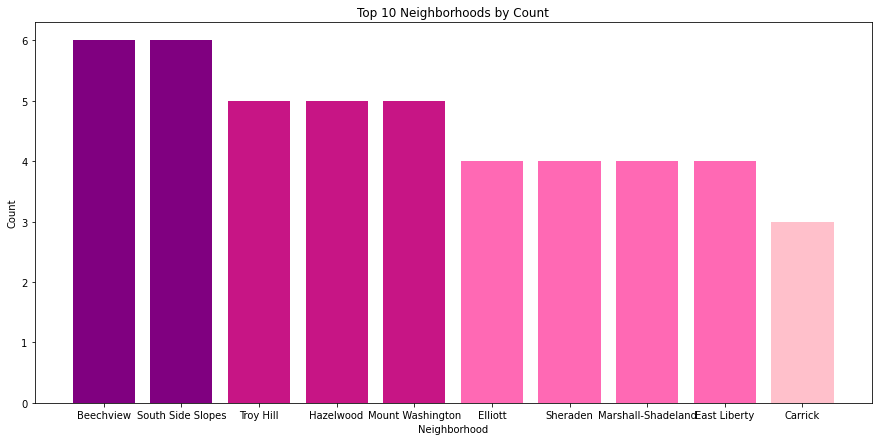

In [19]:
import matplotlib.pyplot as plt
neighborhood_table = neighborhood_table.sort_values(by='count', ascending=False).head(10)
colors = ['purple', 'purple', 'mediumvioletred', 'mediumvioletred', 'mediumvioletred', 'hotpink', 'hotpink', 'hotpink', 'hotpink', 'pink']
plt.figure(figsize=(15, 7))
plt.bar(neighborhood_table['neighborhood'], neighborhood_table['count'], color=colors)
plt.xlabel('Neighborhood')
plt.ylabel('Count')
plt.title('Top 10 Neighborhoods by Count')
plt.show()

**Then I created a color coded map so I can visually see which neighborhoods have the most parks**

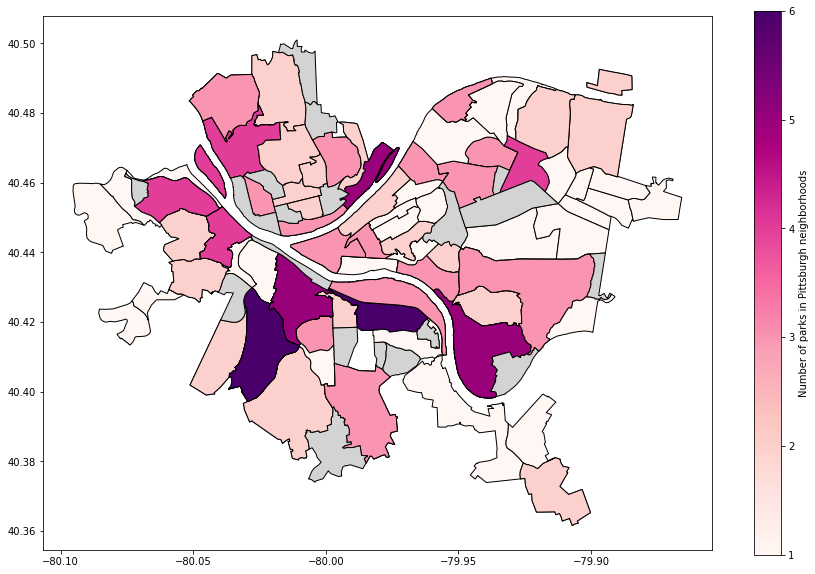

In [5]:
park_map = neighborhoods.merge(park_df, how='left', left_on='hood', right_on='neighborhood')
park_map['neighborhood_counts'] = park_map['hood'].map(neighborhood_counts)
park_map.plot(column='neighborhood_counts',
             cmap='RdPu',
             edgecolor='black',
             legend=True,
             legend_kwds={'label': 'Number of parks in Pittsburgh neighborhoods'},
             figsize=(15, 10),
             missing_kwds={'color': 'lightgrey'})

**Next I gave each neighborhood a score out of 1 so we can find the best data set using a formula and combine with the other data sets**

In [21]:
neighborhood_counts = park_df['neighborhood'].value_counts()
most_frequent_neighborhoods_df = pd.DataFrame({'neighborhood': neighborhood_counts.index, 'count': neighborhood_counts.values})
most_frequent_neighborhoods_df['score'] = most_frequent_neighborhoods_df['count'] / 6 
scores_list = most_frequent_neighborhoods_df['score'].tolist()
print("Scores by Neighborhood:")
for i, score in enumerate(scores_list):
    print(f" {most_frequent_neighborhoods_df['neighborhood'][i]}: {score:.2f}")

Scores by Neighborhood:
 Beechview: 1.00
 South Side Slopes: 1.00
 Troy Hill: 0.83
 Hazelwood: 0.83
 Mount Washington: 0.83
 Elliott: 0.67
 Sheraden: 0.67
 Marshall-Shadeland: 0.67
 East Liberty: 0.67
 Brighton Heights: 0.50
 Spring Hill-City View: 0.50
 Squirrel Hill South: 0.50
 Bloomfield: 0.50
 Garfield: 0.50
 North Shore: 0.50
 Crawford-Roberts: 0.50
 South Oakland: 0.50
 Carrick: 0.50
 Upper Lawrenceville: 0.50
 Manchester: 0.50
 Beltzhoover: 0.50
 Lower Lawrenceville: 0.50
 South Side Flats: 0.50
 Central Business District: 0.50
 Greenfield: 0.33
 Central Northside: 0.33
 Terrace Village: 0.33
 Perry North: 0.33
 Highland Park: 0.33
 Lincoln Place: 0.33
 Allentown: 0.33
 Fineview: 0.33
 Spring Garden: 0.33
 Strip District: 0.33
 Allegheny Center: 0.33
 Brookline: 0.33
 Banksville: 0.33
 Lincoln-Lemington-Belmar: 0.33
 Westwood: 0.33
 Perry South: 0.33
 Crafton Heights: 0.33
 Central Oakland: 0.33
 Swisshelm Park: 0.17
 Bluff: 0.17
 West Oakland: 0.17
 Bon Air: 0.17
 New Homestea

# Parks conclusion

The best neighborhoods in pittsburgh according to the number of parks are

* Beechview
* South Side Slopes

These two neighborhoods both have 6 parks which is the most out of all the neighborhoods in pittsburgh|